In [4]:
# look for missing data and determine how to deal with it

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = sns.load_dataset('penguins')

In [5]:
# count missing data

df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
# option 1 drop rows with missing values

rows = len(df)
threshold = rows * 0.01
print(f"Number of rows: {rows} Threshold: {threshold}.")

cols_to_drop = df.columns[df.isna().sum() > threshold]
print(cols_to_drop)

df_clean = df.dropna(subset=cols_to_drop)
print(len(df_clean))

Number of rows: 344 Threshold: 3.44.
Index(['sex'], dtype='object')
333


In [18]:
# option 2 impute missing values

cols_to_impute = df.columns[df.isna().sum() > 0]
print(cols_to_impute)

df_clean = df.copy()
for col in cols_to_impute:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

df_clean.isna().sum()

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'sex'],
      dtype='object')


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [20]:
# option 2 impute missing values by sub group

body_mass_dict = df.groupby('species')['body_mass_g'].median().to_dict()
print(body_mass_dict)

df_clean = df.copy()
df_clean['body_mass_g'] = df_clean['body_mass_g'].fillna(df_clean['species'].map(body_mass_dict))
df_clean.isna().sum()

{'Adelie': 3700.0, 'Chinstrap': 3700.0, 'Gentoo': 5000.0}


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           0
sex                  11
dtype: int64

In [24]:
# converting categorical data

print(df.select_dtypes('object').head())
print(df.value_counts('species'))
print(df['island'].nunique())

  species     island     sex
0  Adelie  Torgersen    Male
1  Adelie  Torgersen  Female
2  Adelie  Torgersen  Female
3  Adelie  Torgersen     NaN
4  Adelie  Torgersen  Female
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
3


In [ ]:
# advanced column filtering

two_species = 'del|rap'
adelie = '^Ade'

new_categories = ['Two Species','Adelie']

conditions = [
    df['species'].str.contains(two_species),
    df['species'].str.contains(adelie)
]

df_clean = df.copy()
df_clean['new_category'] = np.select(conditions, new_categories, default='Other')
df_clean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,new_category
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,Two Species
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,Two Species
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,Two Species
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,Two Species
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,Two Species


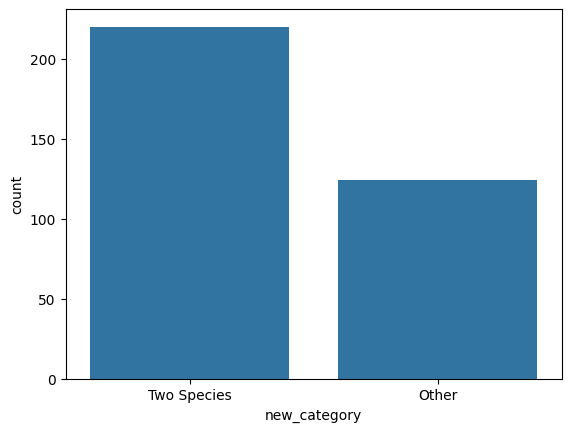

In [ ]:
# Plot the counts of each category

sns.countplot(data=df_clean, x="new_category")
plt.show()

In [38]:
netflix_df = pd.read_csv("netflix_data.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [40]:
# convert string to number

df_clean = netflix_df.copy()
df_clean['show_id_num'] = df_clean['show_id'].str.replace('s', '')
df_clean['show_id_num'] = df_clean['show_id_num'].astype(float)
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,show_id_num
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas,2.0
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies,3.0
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action,4.0
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas,5.0
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV,6.0


In [41]:
# add summary statistics into df

df_clean['duration_std'] = df_clean.groupby('genre')['duration'].transform(lambda x: x.std())
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,show_id_num,duration_std
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas,2.0,23.335905
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies,3.0,15.459045
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action,4.0,23.977286
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas,5.0,23.335905
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV,6.0,0.965673


In [45]:
# handling outliers

q3 = df_clean['duration'].quantile(0.75)
q1 = df_clean['duration'].quantile(0.25)
iqr = q3-q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
df_clean[(df_clean['duration']<lower) | (df_clean['duration']>upper)]

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,show_id_num,duration_std
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV,6.0,0.965673
68,s101,Movie,3 Idiots,Rajkumar Hirani,"Aamir Khan, Kareena Kapoor, Madhavan, Sharman ...",India,"August 1, 2019",2009,164,While attending one of India's premier college...,Comedies,101.0,22.060205
94,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,"July 30, 2019",2019,1,Multiple women report their husbands as missin...,TV Shows,133.0,0.000000
106,s154,Movie,A Bridge Too Far,Richard Attenborough,"Dirk Bogarde, James Caan, Michael Caine, Sean ...",United States,"July 1, 2020",1977,176,This wartime drama details a pivotal day in 19...,Action,154.0,23.977286
114,s163,Movie,A Christmas Special: Miraculous: Tales of Lady...,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...",France,"December 20, 2016",2016,22,Parisian teen Marinette transforms herself int...,Uncategorized,163.0,25.099270
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4755,s7694,Movie,Yaadein,Subhash Ghai,"Jackie Shroff, Hrithik Roshan, Kareena Kapoor,...",India,"March 1, 2018",2001,171,Two young lovers set out to overcome the obsta...,Dramas,7694.0,23.335905
4771,s7722,TV Show,You,Lee Toland Krieger,"Penn Badgley, Elizabeth Lail, Shay Mitchell, J...",United States,"December 26, 2019",2019,2,"Obsessed with an aspiring writer, a charming b...",Crime TV,7722.0,1.725069
4791,s7755,Movie,Yuva,Mani Ratnam,"Ajay Devgn, Abhishek Bachchan, Vivek Oberoi, E...",India,"March 1, 2018",2004,160,An accident on a bridge ties together three yo...,Dramas,7755.0,23.335905
4798,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,"May 21, 2019",2018,159,Through his relationships with two wildly diff...,Comedies,7765.0,22.060205


In [ ]:
# remove outliers

print(len(df_clean))
no_outliers = df_clean[(df_clean['duration']>lower) & (df_clean['duration']<upper)]
print(len(no_outliers))

4812
4423
